In [1]:
import keras
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

C:\Users\HP-1\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
from keras.datasets import mnist
from keras.utils import to_categorical
(train_images,train_labels),(test_images,test_labels)=mnist.load_data()
train_images=train_images.reshape((60000,28,28,1))
test_images=test_images.reshape((10000,28,28,1))
train_images=train_images.astype('float32')/255
test_images=test_images.astype('float32')/255
train_labels=to_categorical(train_labels)
test_labels=to_categorical(test_labels)

In [3]:
from keras import layers
from keras import models
from keras.layers import Conv2D,MaxPooling2D,Dropout,Flatten,Dense

In [4]:
model=models.Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                36928     
__________

In [5]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])
history = model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
60000/60000 [==============================] - 145s 2ms/step - loss: 0.2155 - categorical_accuracy: 0.9348
Epoch 2/5
60000/60000 [==============================] - 158s 3ms/step - loss: 0.0627 - categorical_accuracy: 0.9809
Epoch 3/5
60000/60000 [==============================] - 141s 2ms/step - loss: 0.0463 - categorical_accuracy: 0.9860
Epoch 4/5
60000/60000 [==============================] - 139s 2ms/step - loss: 0.0325 - categorical_accuracy: 0.9905
Epoch 5/5
60000/60000 [==============================] - 119s 2ms/step - loss: 0.0293 - categorical_accuracy: 0.9913


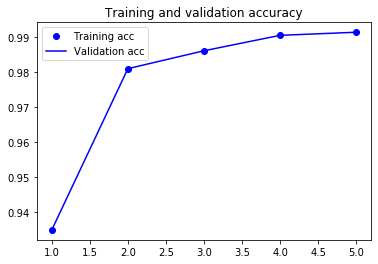

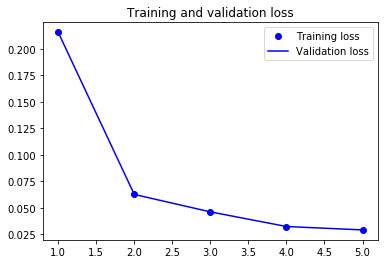

In [6]:
acc = history.history['categorical_accuracy']
loss = history.history['loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.title('Training accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.title('Training loss')
plt.legend()
plt.show()

In [7]:
test_loss,test_acc=model.evaluate(test_images,test_labels)
print("Test accuracy ",test_acc)

10000/10000 [==============================] - 7s 714us/step
Test accuracy  0.9929
